# Image Encryption using Chaos Maps

<b> What are chaos maps? </b>
<br>
Chaotic systems are a simple sub-type of nonlinear dynamical systems. They may contain very few interacting parts and these may follow very simple rules, but these systems all have a very sensitive dependence on their **initial conditions**. Despite their deterministic simplicity, over time these systems can produce totally unpredictable and wildly divergent (aka, chaotic) behavior.

<br>

**Why Chaos Maps for encryption?**
<br>
Traditional encrypting mechanisms AES and RSA exhibit some drawbacks
and weakness in the encryption of digital images
  and high computing

*   Large computational time for large images
*   High computing power for large images
Consequently, there might be better techniques for image encryption.

A few chaos based algorithms provide a good combination of speed, high security complexity, low computational overheads
Moreover, **certain** chaos-based and other dynamical systems based algorithms have many important properties such as

*   sensitive dependence on initial parameters
*   pseudorandom properties
*   ergodicity
*   non periodicity

In [ ]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import random
from math import log
from google.colab.patches import cv2_imshow
from tqdm import tqdm

###Downloading images
Downloading sample images "HorizonZero.png" and "lena.bmp"

In [ ]:
# Downloading HorizonZero.png
!wget https://drive.google.com/uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm
!mv uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm HorizonZero.png

# Downloading lena.bmp
!wget https://drive.google.com/uc?id=19xZhsjs_r0tLwtu_Wl5DB5rG26dhw069
!mv uc?id=19xZhsjs_r0tLwtu_Wl5DB5rG26dhw069 lena.bmp

--2023-10-31 08:50:12--  https://drive.google.com/uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm
Resolving drive.google.com (drive.google.com)... 173.194.213.138, 173.194.213.101, 173.194.213.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.213.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/q5ihmi3hv6mugbhmuudjdcbskdm6eko1/1698742200000/05356688754188258246/*/1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm?uuid=6e8f0492-886f-4b63-a203-f75fec4c8c38 [following]
--2023-10-31 08:50:12--  https://doc-08-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/q5ihmi3hv6mugbhmuudjdcbskdm6eko1/1698742200000/05356688754188258246/*/1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm?uuid=6e8f0492-886f-4b63-a203-f75fec4c8c38
Resolving doc-08-40-docs.googleusercontent.com (doc-08-40-docs.googleusercontent.com)... 108.177.12.132, 2607:f8b0:400c:c08::84
Connecting to do

Function to get Image matrix from Pixel Access object

In [ ]:
def getImageMatrix(imageName):
    im = Image.open(imageName)
    pix = im.load()
    color = 1
    if type(pix[0,0]) == int:
      color = 0
    image_size = im.size
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix,image_size[0],color

In [ ]:
def getImageMatrix_gray(imageName):
    im = Image.open(imageName).convert('LA')
    pix = im.load()
    image_size = im.size
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix,image_size[0]

# Arnold Cat Map

Arnold's cat map is a chaotic map often used for pixel manipulation. It applies a tranform on the image that essentially shuffles the pixels by stretching anf folding thethe image. When an optimal number of iterations of the transformation is applied on the image, the resulting image becomes incomprehensible and hence encrypted.

For this implementation
The transform applied on the image is:
R([x,y]) = [(x + y) mod n, (x + 2y) mod n]
where n is the dimensions of the image

<br>

When the transformation is repeated enough times, the original image will reappear.
The number of iterations 'n' at which the original image will reappear is given by these rules of thumb:
Here 'd' is the dimension of the square image:

1.   if d =  2.(5^i) for i >=1, n = 3*d
2.   if d = (5^i) for i >=1, n = 2*d
3.   if d = 6.(5^i) for i>=1, n = 2*d
4.   else n <= 12*d / 7

This periodicity forms the crux of the encryption process. Here key is the number of iterations of transformations initially applied to get the encrypted image. n - key is the number of rounds of transformations applied to get the decrypted image.

In [ ]:
def ArnoldCatTransform(img, num):
    rows, cols, ch = img.shape
    n = rows
    img_arnold = np.zeros([rows, cols, ch])
    for x in range(0, rows):
        for y in range(0, cols):
            img_arnold[x][y] = img[(x+y)%n][(x+2*y)%n]
    return img_arnold

Arnold Cat Encryption

In [ ]:
def ArnoldCatEncryption(imageName, key):
    img = cv2.imread(imageName)
    for i in range (0,key):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('.')[0] + "_ArnoldcatEnc.png", img)
    return img

Arnold Cat Decryption

In [ ]:
def ArnoldCatDecryption(imageName, key):
    img = cv2.imread(imageName)
    rows, cols, ch = img.shape
    dimension = rows
    decrypt_it = dimension
    if (dimension%2==0) and 5**int(round(log(dimension/2,5))) == int(dimension/2):
        decrypt_it = 3*dimension
    elif 5**int(round(log(dimension,5))) == int(dimension):
        decrypt_it = 2*dimension
    elif (dimension%6==0) and  5**int(round(log(dimension/6,5))) == int(dimension/6):
        decrypt_it = 2*dimension
    else:
        decrypt_it = int(12*dimension/7)
    for i in range(key,decrypt_it):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('_')[0] + "_ArnoldcatDec.png",img)
    return img

In [ ]:
image = "HorizonZero"
ext = ".png"
key = 20

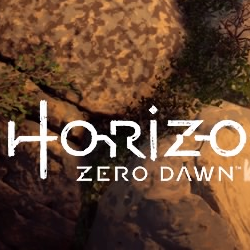

In [ ]:
img = cv2.imread(image + ext)
cv2_imshow(img)

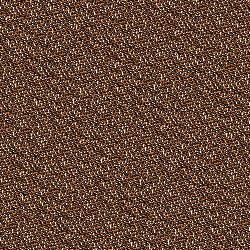

In [ ]:
ArnoldCatEncryptionIm = ArnoldCatEncryption(image + ext, key)
cv2_imshow(ArnoldCatEncryptionIm)

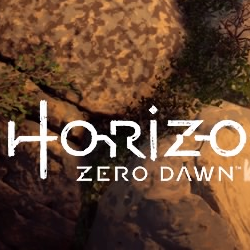

In [ ]:
ArnoldCatDecryptionIm = ArnoldCatDecryption(image + "_ArnoldcatEnc.png", key)
cv2_imshow(ArnoldCatDecryptionIm)

## Histogram Analysis


The ciphertext image histogram analysis is one of the most straight-forward methods ofillustrating the image encryption quality. A good image encryption method tends to encrypt a plaintext image to a random incomprehensible form. Thus a good image encyption technique generates a cipher image that has a uniformly distributed intensity histogram.

### Original Image

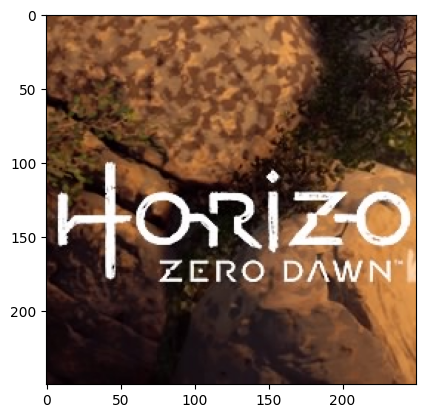

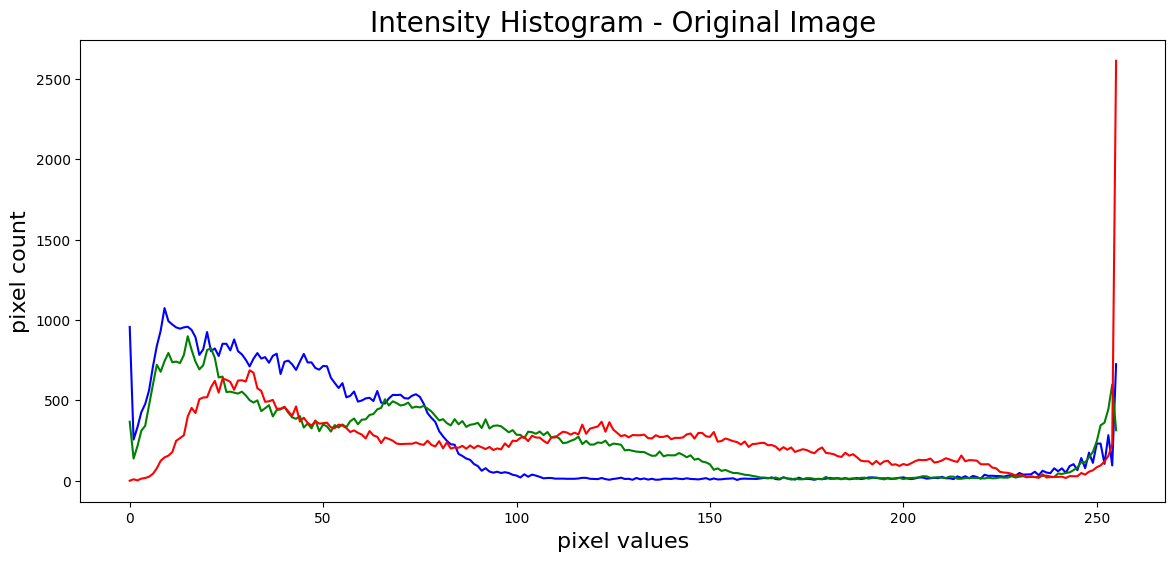

In [ ]:
image = "HorizonZero"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16)
plt.show()

### Encrypted Image

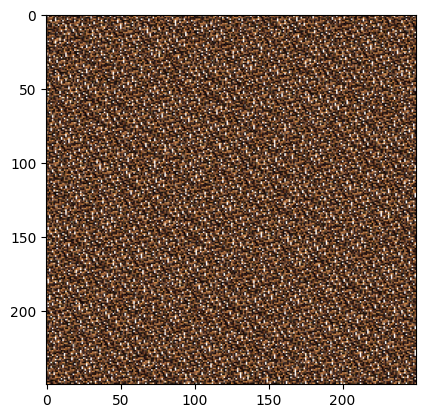

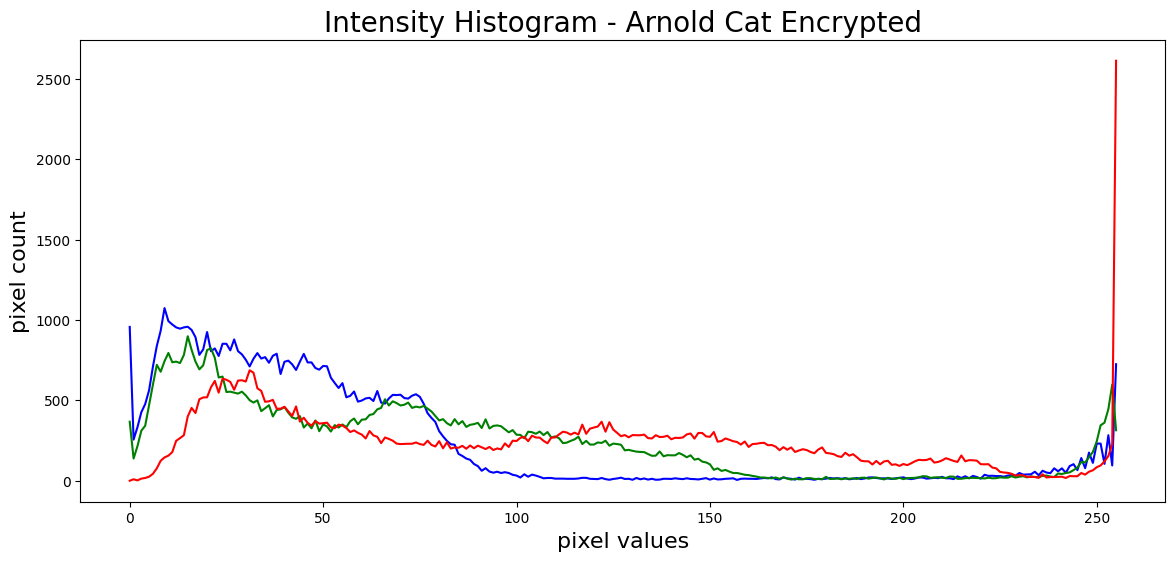

In [ ]:
image = "HorizonZero_ArnoldcatEnc"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Arnold Cat Encrypted', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16)
plt.show()

## Adjacent Pixel Auto-Correlation
Since images exhibit high information redundancy, it is desirable to have an encryption algorithm that breaks this redundancy. Thus as a metric of encryption performance we find the correlation between adjacent pixels in a direction (Horizontal, Vertical or Diagonal). We have considered the Horizontal direction.

1024 random pixels are picked up from the image and its correlation between it's rightmost neighbour is found and plotted. For a good algorithm, the correlation plot should appear random with no discernable pattern

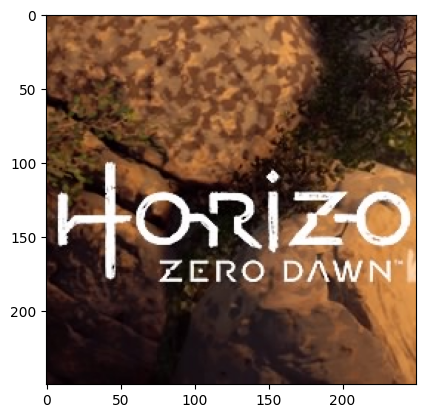

In [ ]:
image = "HorizonZero"
ext = ".png"
img = Image.open(image+ext).convert('LA')
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

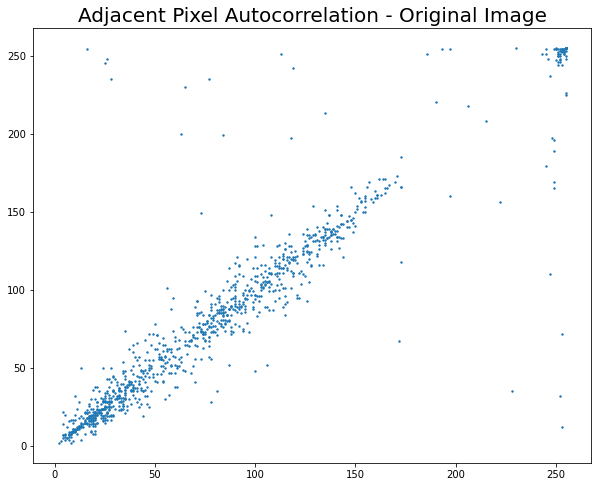

In [ ]:
image = "HorizonZero"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

250


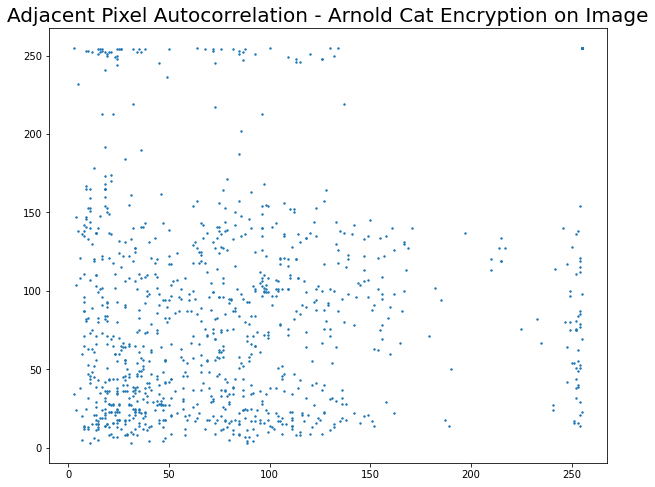

In [ ]:
image = "HorizonZero_ArnoldcatEnc"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
print(image_size)
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Arnold Cat Encryption on Image', fontsize=20)
plt.show()

# Henon Map


Given initial conditions (x0,y0), a henon map is given by the following equations:
<br>

(Xn+1) = (Yn) + 1 − a.(Xn)

(Yn+1) = b * (Xn)

Classical Henon map have values of a = 1.4 and b = 0.3. For the classical values the Henon map is chaotic. For other values of a and b the map may be chaotic, intermittent, or converge to a periodic orbit.

In [ ]:
def dec(bitSequence):
    decimal = 0
    for bit in bitSequence:
        decimal = decimal * 2 + int(bit)
    return decimal

In [ ]:
def genHenonMap(dimension, key):
    x = key[0]
    y = key[1]
    sequenceSize = dimension * dimension * 8 #Total Number of bitSequence produced
    bitSequence = []    #Each bitSequence contains 8 bits
    byteArray = []      #Each byteArray contains m( i.e 512 in this case) bitSequence
    TImageMatrix = []   #Each TImageMatrix contains m*n byteArray( i.e 512 byteArray in this case)
    for i in range(sequenceSize):
        xN = y + 1 - 1.4 * x**2
        yN = 0.3 * x

        x = xN
        y = yN

        if xN <= 0.4:
            bit = 0
        else:
            bit = 1

        try:
            bitSequence.append(bit)
        except:
            bitSequence = [bit]

        if i % 8 == 7:
            decimal = dec(bitSequence)
            try:
                byteArray.append(decimal)
            except:
                byteArray = [decimal]
            bitSequence = []

        byteArraySize = dimension*8
        if i % byteArraySize == byteArraySize-1:
            try:
                TImageMatrix.append(byteArray)
            except:
                TImageMatrix = [byteArray]
            byteArray = []
    return TImageMatrix

## Henon Encryption


In [ ]:
def HenonEncryption(imageName,key):
    imageMatrix, dimension, color = getImageMatrix(imageName)
    transformationMatrix = genHenonMap(dimension, key)
    resultantMatrix = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            try:
                if color:
                    row.append(tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]))
                else:
                    row.append(transformationMatrix[i][j] ^ imageMatrix[i][j])
            except:
                if color:
                    row = [tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]])]
                else :
                    row = [transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]
        try:
            resultantMatrix.append(row)
        except:
            resultantMatrix = [row]
    if color:
      im = Image.new("RGB", (dimension, dimension))
    else:
      im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels

    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = resultantMatrix[x][y]
    im.save(imageName.split('.')[0] + "_HenonEnc.png", "PNG")

## Henon Decryption

In [ ]:
def HenonDecryption(imageNameEnc, key):
    imageMatrix, dimension, color = getImageMatrix(imageNameEnc)
    transformationMatrix = genHenonMap(dimension, key)
    pil_im = Image.open(imageNameEnc, 'r')
    imshow(np.asarray(pil_im))
    henonDecryptedImage = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            try:
                if color:
                    row.append(tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]))
                else:
                    row.append(transformationMatrix[i][j] ^ imageMatrix[i][j])
            except:
                if color:
                    row = [tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]])]
                else :
                    row = [transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]
        try:
            henonDecryptedImage.append(row)
        except:
            henonDecryptedImage = [row]
    if color:
        im = Image.new("RGB", (dimension, dimension))
    else:
        im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels

    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = henonDecryptedImage[x][y]
    im.save(imageNameEnc.split('_')[0] + "_HenonDec.png", "PNG")

## Comparision

In [ ]:
image = "HorizonZero"
ext = ".png"
key = (0.1,0.1)

### Original Image

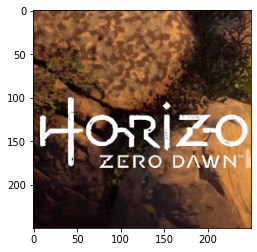

In [ ]:
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

### Encryption

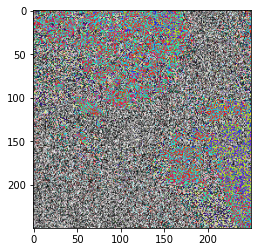

In [ ]:
HenonEncryption(image + ext, key)
im = Image.open(image + "_HenonEnc.png", 'r')
imshow(np.asarray(im))

### Decryption

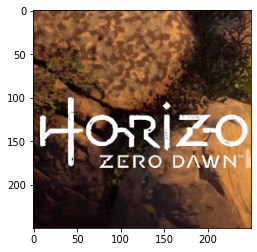

In [ ]:
HenonDecryption(image + "_HenonEnc.png", key)
im = Image.open(image + "_HenonDec.png", 'r')
imshow(np.asarray(im))

In [ ]:
image = "lena"
ext = ".bmp"
key = (0.1, 0.1)

### Original Image

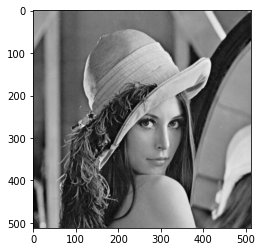

In [ ]:
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im), cmap='gray')

### Encrypted Image

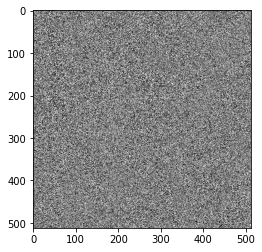

In [ ]:
HenonEncryption(image + ext, key)
im = Image.open(image + "_HenonEnc.png", 'r')
imshow(np.asarray(im), cmap='gray')

### Decrypted Image

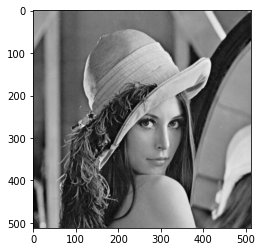

In [ ]:
HenonDecryption(image + "_HenonEnc.png", key)
im = Image.open(image + "_HenonDec.png", 'r')
imshow(np.asarray(im), cmap='gray')

## Histogram


### Original Image

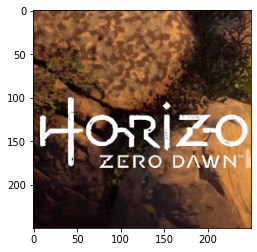

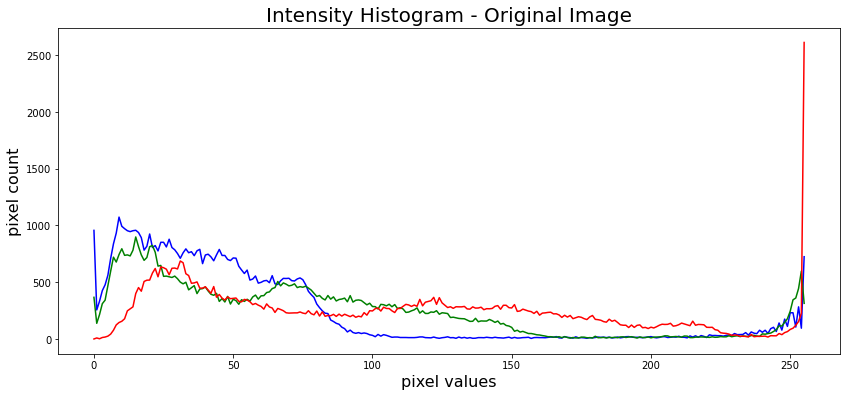

In [ ]:
image = "HorizonZero"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16)
plt.show()

### Encrypted Image

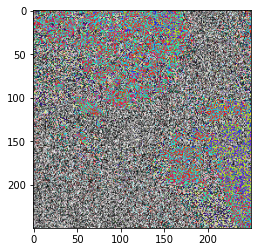

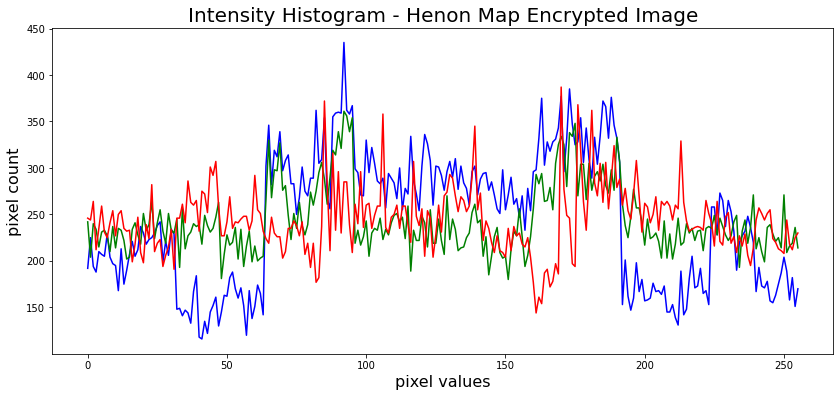

In [ ]:
image = "HorizonZero_HenonEnc"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Henon Map Encrypted Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16)
plt.show()

## Adjacent Pixel AutoCorrelation

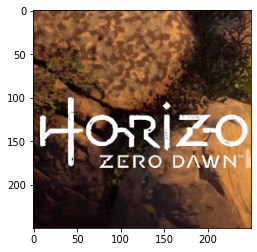

In [ ]:
image = "HorizonZero"
ext = ".png"
img = Image.open(image+ext).convert('LA')
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

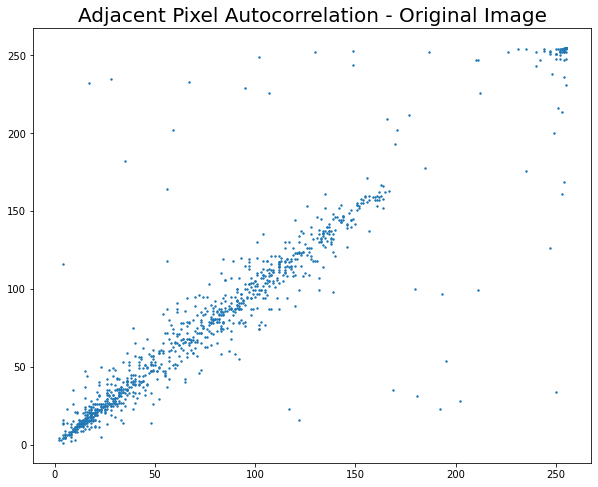

In [ ]:
image = "HorizonZero"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

250


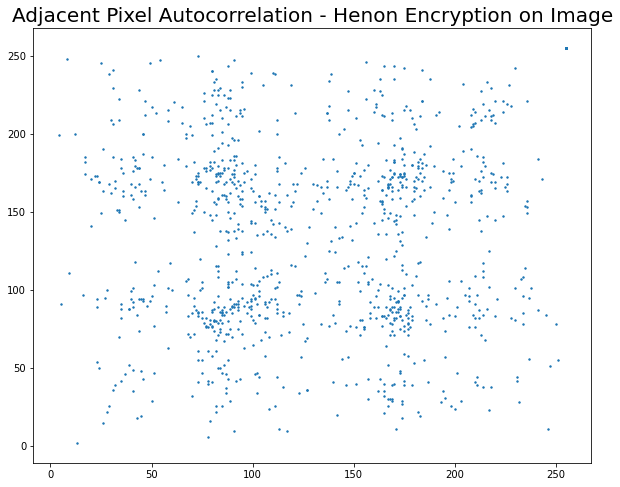

In [ ]:
image = "HorizonZero_HenonEnc"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
print(image_size)
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Henon Encryption on Image', fontsize=20)
plt.show()

# Logistic Chaos Maps with key mixing

The logistic map instead uses a nonlinear difference equation to look at discrete time steps. It’s called the logistic map because it maps the population value at any time step to its value at the next time step.

The basic formula is:
(X_t+1) = r.X_t.(1 - X_t)

For this implementation we have included key mixing. The initial values of the chaos map is recalculated after every pixel encryption based on the previous encryption value as well as the key value.

In [ ]:
def LogisticEncryption(imageName, key):
    N = 256
    key_list = [ord(x) for x in key]
    G = [key_list[0:4] ,key_list[4:8], key_list[8:12]]
    g = []
    R = 1
    for i in range(1,4):
        s = 0
        for j in range(1,5):
            s += G[i-1][j-1] * (10**(-j))
        g.append(s)
        R = (R*s) % 1

    L = (R + key_list[12]/256) % 1
    S_x = round(((g[0]+g[1]+g[2])*(10**4) + L *(10**4)) % 256)
    V1 = sum(key_list)
    V2 = key_list[0]
    for i in range(1,13):
        V2 = V2 ^ key_list[i]
    V = V2/V1

    L_y = (V+key_list[12]/256) % 1
    S_y = round((V+V2+L_y*10**4) % 256)
    C1_0 = S_x
    C2_0 = S_y
    C = round((L*L_y*10**4) % 256)
    C_r = round((L*L_y*10**4) % 256)
    C_g = round((L*L_y*10**4) % 256)
    C_b = round((L*L_y*10**4) % 256)
    x = 4*(S_x)*(1-S_x)
    y = 4*(S_y)*(1-S_y)

    imageMatrix,dimension, color = getImageMatrix(imageName)
    LogisticEncryptionIm = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            while x <0.8 and x > 0.2 :
                x = 4*x*(1-x)
            while y <0.8 and y > 0.2 :
                y = 4*y*(1-y)
            x_round = round((x*(10**4))%256)
            y_round = round((y*(10**4))%256)
            C1 = x_round ^ ((key_list[0]+x_round) % N) ^ ((C1_0 + key_list[1])%N)
            C2 = x_round ^ ((key_list[2]+y_round) % N) ^ ((C2_0 + key_list[3])%N)
            if color:
              C_r =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][0]) % N) ^ ((C_r + key_list[7]) % N)
              C_g =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][1]) % N) ^ ((C_g + key_list[7]) % N)
              C_b =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][2]) % N) ^ ((C_b + key_list[7]) % N)
              row.append((C_r,C_g,C_b))
              C = C_r

            else:
              C = ((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j]) % N) ^ ((C + key_list[7]) % N)
              row.append(C)

            x = (x + C/256 + key_list[8]/256 + key_list[9]/256) % 1
            y = (x + C/256 + key_list[8]/256 + key_list[9]/256) % 1
            for ki in range(12):
                key_list[ki] = (key_list[ki] + key_list[12]) % 256
                key_list[12] = key_list[12] ^ key_list[ki]
        LogisticEncryptionIm.append(row)

    im = Image.new("L", (dimension, dimension))
    if color:
        im = Image.new("RGB", (dimension, dimension))
    else:
        im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels

    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = LogisticEncryptionIm[x][y]
    im.save(imageName.split('.')[0] + "_LogisticEnc.png", "PNG")

In [ ]:
def LogisticDecryption(imageName, key):
    N = 256
    key_list = [ord(x) for x in key]

    G = [key_list[0:4] ,key_list[4:8], key_list[8:12]]
    g = []
    R = 1
    for i in range(1,4):
        s = 0
        for j in range(1,5):
            s += G[i-1][j-1] * (10**(-j))
        g.append(s)
        R = (R*s) % 1

    L_x = (R + key_list[12]/256) % 1
    S_x = round(((g[0]+g[1]+g[2])*(10**4) + L_x *(10**4)) % 256)
    V1 = sum(key_list)
    V2 = key_list[0]
    for i in range(1,13):
        V2 = V2 ^ key_list[i]
    V = V2/V1

    L_y = (V+key_list[12]/256) % 1
    S_y = round((V+V2+L_y*10**4) % 256)
    C1_0 = S_x
    C2_0 = S_y

    C = round((L_x*L_y*10**4) % 256)
    I_prev = C
    I_prev_r = C
    I_prev_g = C
    I_prev_b = C
    I = C
    I_r = C
    I_g = C
    I_b = C
    x_prev = 4*(S_x)*(1-S_x)
    y_prev = 4*(L_x)*(1-S_y)
    x = x_prev
    y = y_prev
    imageMatrix, dimension, color = getImageMatrix(imageName)

    henonDecryptedImage = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            while x <0.8 and x > 0.2 :
                x = 4*x*(1-x)
            while y <0.8 and y > 0.2 :
                y = 4*y*(1-y)
            x_round = round((x*(10**4))%256)
            y_round = round((y*(10**4))%256)
            C1 = x_round ^ ((key_list[0]+x_round) % N) ^ ((C1_0 + key_list[1])%N)
            C2 = x_round ^ ((key_list[2]+y_round) % N) ^ ((C2_0 + key_list[3])%N)
            if color:
                I_r = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_r + key_list[7]) % N) ^ imageMatrix[i][j][0]) + N-key_list[6])%N
                I_g = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_g + key_list[7]) % N) ^ imageMatrix[i][j][1]) + N-key_list[6])%N
                I_b = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_b + key_list[7]) % N) ^ imageMatrix[i][j][2]) + N-key_list[6])%N
                I_prev_r = imageMatrix[i][j][0]
                I_prev_g = imageMatrix[i][j][1]
                I_prev_b = imageMatrix[i][j][2]
                row.append((I_r,I_g,I_b))
                x = (x +  imageMatrix[i][j][0]/256 + key_list[8]/256 + key_list[9]/256) % 1
                y = (x +  imageMatrix[i][j][0]/256 + key_list[8]/256 + key_list[9]/256) % 1
            else:
                I = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev+key_list[7]) % N) ^ imageMatrix[i][j]) + N-key_list[6])%N
                I_prev = imageMatrix[i][j]
                row.append(I)
                x = (x +  imageMatrix[i][j]/256 + key_list[8]/256 + key_list[9]/256) % 1
                y = (x +  imageMatrix[i][j]/256 + key_list[8]/256 + key_list[9]/256) % 1
            for ki in range(12):
                key_list[ki] = (key_list[ki] + key_list[12]) % 256
                key_list[12] = key_list[12] ^ key_list[ki]
        henonDecryptedImage.append(row)
    if color:
        im = Image.new("RGB", (dimension, dimension))
    else:
        im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels
    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = henonDecryptedImage[x][y]
    im.save(imageName.split('_')[0] + "_LogisticDec.png", "PNG")

### Original Image

In [ ]:
image = "lena"
ext = ".bmp"

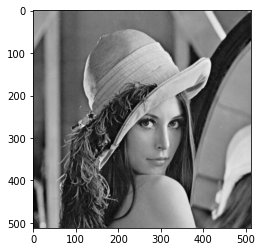

In [ ]:
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im), cmap='gray')

### Encryption

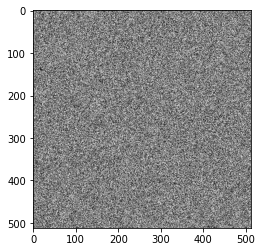

In [ ]:
LogisticEncryption("lena.bmp", "abcdefghijklm")
im = Image.open("lena_LogisticEnc.png", 'r')
imshow(np.asarray(im), cmap='gray')

### Decryption

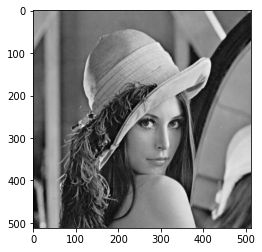

In [ ]:
LogisticDecryption("lena_LogisticEnc.png","abcdefghijklm")
im = Image.open("lena_LogisticDec.png", 'r')
imshow(np.asarray(im),cmap='gray')

### Original Image

In [ ]:
image = "HorizonZero"
ext = ".png"
key = "abcdefghijklm"

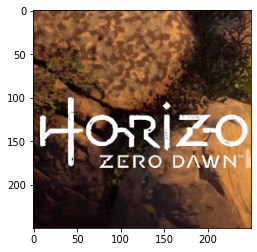

In [ ]:
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im), cmap='gray')

### Encryption

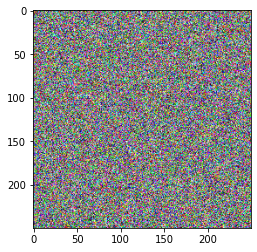

In [ ]:
LogisticEncryption(image + ext, key)
im = Image.open(image + "_LogisticEnc.png", 'r')
imshow(np.asarray(im))

### Decryption

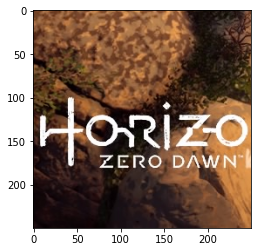

In [ ]:
LogisticDecryption(image + "_LogisticEnc.png", key)
im = Image.open(image + "_LogisticDec.png", 'r')
imshow(np.asarray(im))

## Histogram Analysis

### Original Image

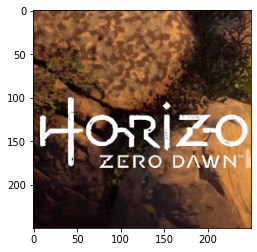

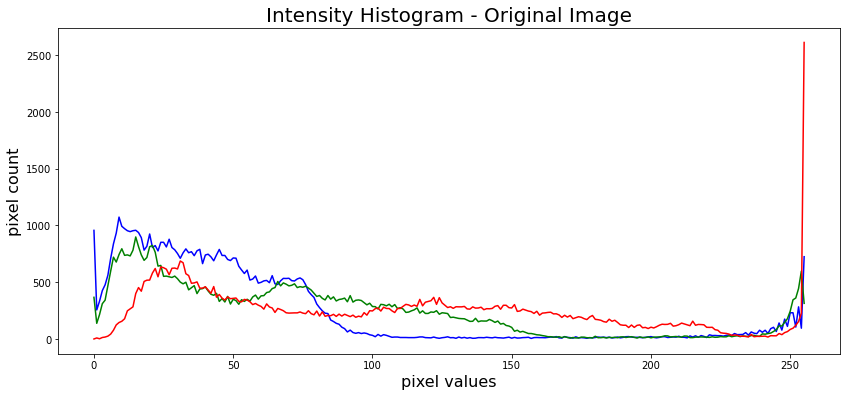

In [ ]:
image = "HorizonZero"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16)
plt.show()

### Encrypted Image

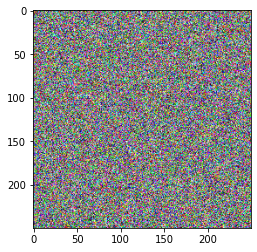

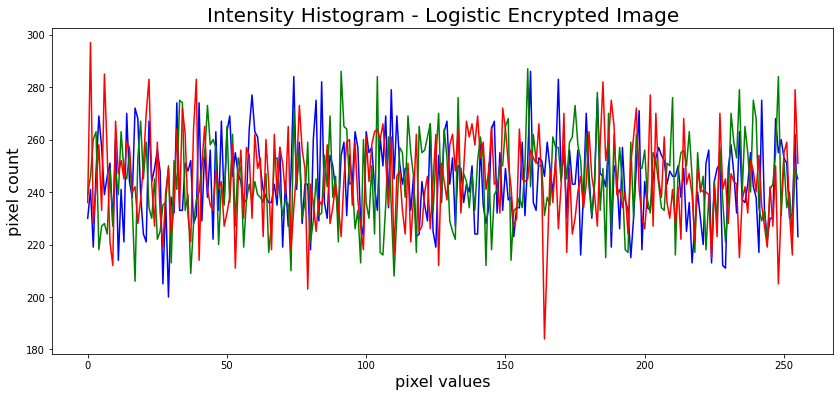

In [ ]:
image = "HorizonZero_LogisticEnc"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Logistic Encrypted Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16)
plt.show()

## Adjacent Pixel Auto-Correlation

### Original Image

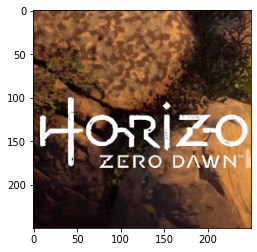

In [ ]:
image = "HorizonZero"
ext = ".png"
img = Image.open(image+ext).convert('LA')
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

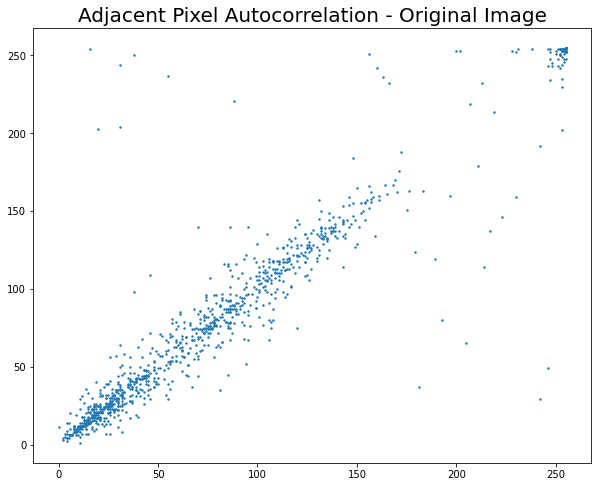

In [ ]:
image = "HorizonZero"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

### Encrypted Image

250


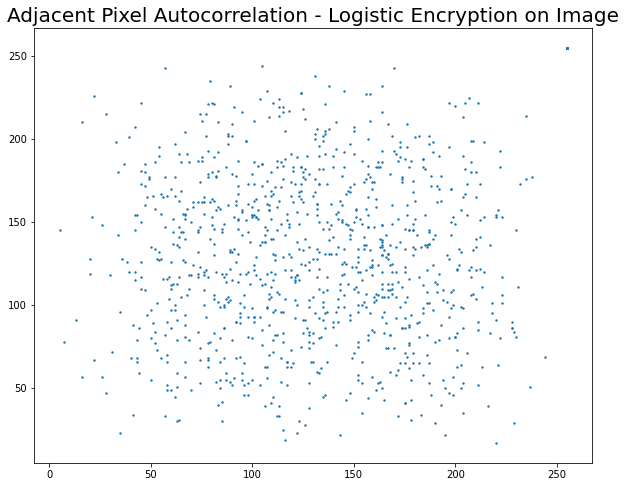

In [ ]:
image = "HorizonZero_LogisticEnc"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
print(image_size)
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Logistic Encryption on Image', fontsize=20)
plt.show()

# Key Sensitivity

An ideal image encryption algorithm should be sensitive with respect to thesecret key i.e a small change in the key should produce a completely differentencrypted image.To test the key sensitivity the we encrypt the plain image with the threealgorithms. We then try decrypting them with a slightly changed key.

### Original Image

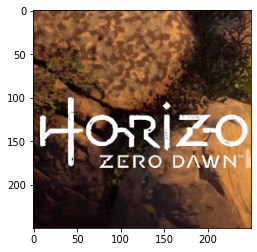

In [ ]:
image = "HorizonZero"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

## Arnold Cat

Encrypt with key = 20

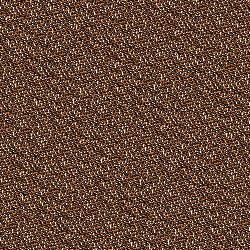

In [ ]:
ArnoldCatEncryptionIm = ArnoldCatEncryption(image + ext, 20)
cv2_imshow(ArnoldCatEncryptionIm)

Decrypt with key = 19

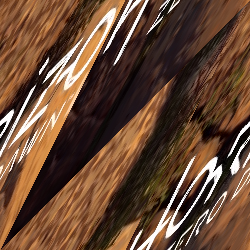

In [ ]:
ArnoldCatDecryptionIm = ArnoldCatDecryption(image + "_ArnoldcatEnc.png", 19)
cv2_imshow(ArnoldCatDecryptionIm)

## Henon Maps

Encrypt with key (0.1, 0.1)

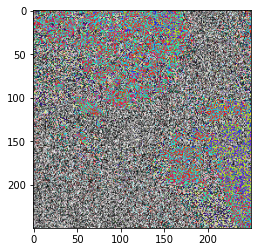

In [ ]:
HenonEncryption(image + ext, (0.1, 0.1))
im = Image.open(image + "_HenonEnc.png", 'r')
imshow(np.asarray(im))

Decrypt with the key (0.1, 0.101)

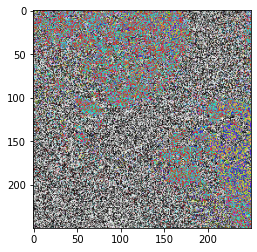

In [ ]:
HenonDecryption(image + "_HenonEnc.png", (0.1, 0.101))
im = Image.open(image + "_HenonDec.png", 'r')
imshow(np.asarray(im))

## Logistic Maps

Encrypt with the key "supersecretke"

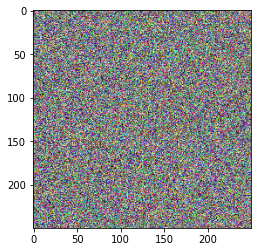

In [ ]:
LogisticEncryption(image + ext, key = "supersecretke")
im = Image.open(image + "_LogisticEnc.png", 'r')
imshow(np.asarray(im))

Decrypt with the key "supersecretkd"

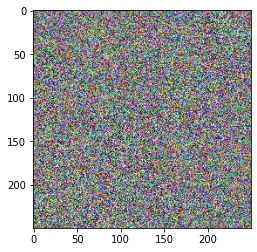

In [ ]:
LogisticDecryption(image + "_LogisticEnc.png", "supersecretkd")
im = Image.open(image + "_LogisticDec.png", 'r')
imshow(np.asarray(im))